##Test Lib.
Este escript se usará para probar las librerias de imaganes hiperespectrales. Se implementaran las pricipales libr en Python y se probará

Se activa el almacenamiento en google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


instalación de la libreria

In [2]:
!pip install PyOpenGL PyOpenGL_accelerate
#!pip install -U wxPython
!pip install -U \
    -f https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04 \
    wxPython
!pip install Pillow
!pip install spectral

     |████████████████████████████████| 542kB 9.5MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593733 sha256=2aa8c4ec1f65f7bad93a2961e4c1c34a8a3102936d932217f7649ed55dd2877b
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate
Looking in links: https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04
     |████████████████████████████████| 104.4MB 40kB/s 
     |████████████████████████████████| 153kB 8.2MB/s 
  Created wheel for spectral: filename=spectral-0.20-cp36-none-any.whl size=183917 sha256=d431c20c37d6d09a5326bd7f03577585135d7f21aa09d70ea374c9313e71da6e
  Stored in directory: /root/.cache/pip/wheels/ad/cf/f3/3cab28f6aed46f15c8db09c6ad678483610426261025e61ff8
Successfully built spectral


Cargar librerias.

In [3]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import wx
#from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x


#Cargar datos Test.
#data_hdr     = '/content/drive/My Drive/Tesis/DatosAnalizar/Experiment 2/test/test_d6/test_16000_us_2x_2019-11-29T111436_corr.hdr'
#data_hyspex  = '/content/drive/My Drive/Tesis/DatosAnalizar/Experiment 2/test/test_d6/test_16000_us_2x_2019-11-29T111436_corr.hyspex'
#Cargar datos mangoSample.
data_hdr     = '/content/drive/My Drive/Tesis/DatosAnalizar/Experiment 2/tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hdr'
data_hyspex  = '/content/drive/My Drive/Tesis/DatosAnalizar/Experiment 2/tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'

DataHyspec = envi.open(data_hdr,data_hyspex)
print(DataHyspec)
#img.info()
#view = imshow(img)
#view_nd(img)
#save_rgb('rgb.jpg', img, [29, 19, 9])

	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Experiment 2/tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'
	# Rows:           3800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


ImageView object:
  Display bands       :  [55, 41, 12]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 33950.0]
    G: [0.0, 27610.0]
    B: [0.0, 6812.0]



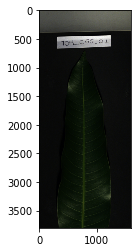

In [4]:
Display_V1 = imshow(DataHyspec)
#save_rgb('Display_V1.jpg', DataHyspec)
print(Display_V1)
#print(DataHyspec['Bands'])

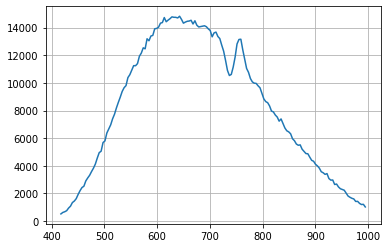

In [5]:
#print(DataHyspec.nbands)
#view_cube(DataHyspec, bands=[29, 19, 9])
#print(DataHyspec.read_pixel(0,1000))
fig, ax = plt.subplots()
ax.plot(DataHyspec.bands.centers, DataHyspec.read_pixel(0,1000))
ax.grid()
##fig.savefig("test.png")
plt.show()
##reflectance = DataHyspec[pixel_y,pixel_x,:]
##reflectance[nan_ind]=np.nan

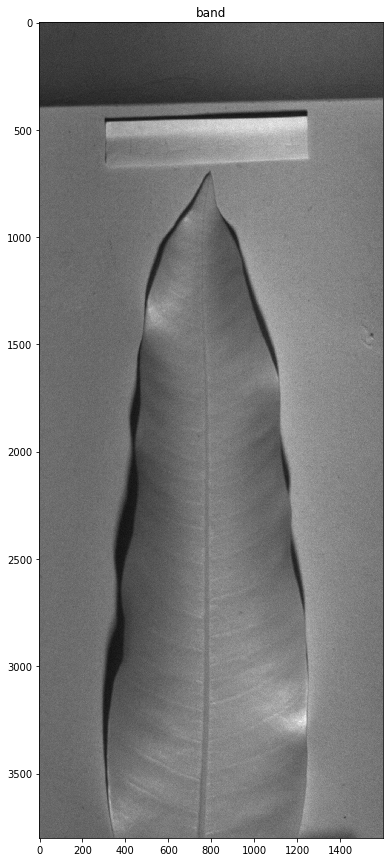

In [6]:
plt.figure(figsize=(15,15))        
#plt.imshow(HUV, cmap=plt.cm.gray), plt.title('band')
# Start 0 to (bands-1)
plt.imshow(DataHyspec.read_band(159), cmap=plt.cm.gray), plt.title('band')
plt.show()

In [7]:
#print(DataHyspec.read_band(5))
print(DataHyspec.bands.centers)
#print(read_band(10,DataHyspec)

[417.563436, 421.192819, 424.822201, 428.451583, 432.080965, 435.710347, 439.33973, 442.969112, 446.598494, 450.227876, 453.857258, 457.48664, 461.116023, 464.745405, 468.374787, 472.004169, 475.633551, 479.262934, 482.892316, 486.521698, 490.15108, 493.780462, 497.409844, 501.039227, 504.668609, 508.297991, 511.927373, 515.556755, 519.186138, 522.81552, 526.444902, 530.074284, 533.703666, 537.333048, 540.962431, 544.591813, 548.221195, 551.850577, 555.479959, 559.109341, 562.738724, 566.368106, 569.997488, 573.62687, 577.256252, 580.885635, 584.515017, 588.144399, 591.773781, 595.403163, 599.032545, 602.661928, 606.29131, 609.920692, 613.550074, 617.179456, 620.808839, 624.438221, 628.067603, 631.696985, 635.326367, 638.955749, 642.585132, 646.214514, 649.843896, 653.473278, 657.10266, 660.732043, 664.361425, 667.990807, 671.620189, 675.249571, 678.878953, 682.508336, 686.137718, 689.7671, 693.396482, 697.025864, 700.655247, 704.284629, 707.914011, 711.543393, 715.172775, 718.802157, 

In [8]:
def spectraPlot(pixel_x,pixel_y):

    reflectance = refl[pixel_y,pixel_x]
    #reflectance[nan_ind]=np.nan
    #print(reflectance)
    pixel_df = pd.DataFrame()
    pixel_df['reflectance'] = reflectance
    pixel_df['wavelengths'] = w
        
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(1,2,1)
        
    # fig, axes = plt.subplots(nrows=1, ncols=2)
    
    pixel_df.plot(ax=ax1,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    pixel_df.plot(ax=ax1,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    ax1.set_title('Spectra of Pixel (' + str(pixel_x) + ',' + str(pixel_y) + ')')
    ax1.set_xlim([np.min(pixel_df['wavelengths']),np.max(pixel_df['wavelengths'])]); 
    ax1.set_ylim([np.min(pixel_df['reflectance']),np.max(pixel_df['reflectance']*1.1)])
    ax1.set_xlabel("wavelengths, nm"); ax1.set_ylabel("Reflectance")
    ax1.grid('on')
    
    ax2 = fig.add_subplot(1,2,2)
    #plot = plt.imshow(refl_band,extent=metadata['spatial extent'],clim=(0,0.1)); 
    plot = plt.imshow(DataHyspec.read_band(159), cmap=plt.cm.gray)
    plt.title('Pixel Location'); 
    cbar = plt.colorbar(plot,aspect=20); plt.set_cmap('gist_earth'); 
    cbar.set_label('Reflectance?',rotation=90,labelpad=20); 
    ax2.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(ax2.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
    
    ax2.plot(pixel_x,pixel_y,'s',markersize=5,color='red')
    #ax2.set_xlim(metadata['spatial extent'][0],metadata['spatial extent'][1])
    #ax2.set_ylim(metadata['spatial extent'][2],metadata['spatial extent'][3])
refl = DataHyspec
w = DataHyspec.bands.centers
interact(spectraPlot, pixel_x = (0,refl.shape[1]-1,1),pixel_y=(0,refl.shape[0]-1,1))   

interactive(children=(IntSlider(value=799, description='pixel_x', max=1599), IntSlider(value=1899, description…

<function __main__.spectraPlot>

# Nueva sección

# Nueva sección